In [92]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [171]:
import geopandas as gpd
import pandas as pd

# 최신 도로망 데이터 (절대 경로로 수정)
dj_road = gpd.read_file("C://Users//cham3//Desktop//data//32.대전광역시_level5_5_link_주요도로망_형상_2022.geojson")
#sj_road = gpd.read_file("C://Users//cham3//Desktop//data//48.세종특별시_level5_5_link_주요도로망_형상_2022.geojson")
#cj_road = gpd.read_file("C://Users//cham3//Desktop//data//16.청주시_level5_5_link_주요도로망_형상_2022.geojson")

# 데이터 합치기 (GeoDataFrame으로 유지)
road_shp = pd.concat([dj_road])

# 중복된 도로 제거 (k_link_id 기준)
road_shp = road_shp.drop_duplicates(subset=['k_link_id'])

# 데이터 개수 출력
print(len(road_shp))
road_shp


1882


,k_link_id,fnode_id,tnode_id,road_name,road_no,road_rank,link_type,lane,road_info,sido_id,sigungu_id,emd_id,k_length,geometry
0,1026318.0,277802.0,280751.0,동서대로,0,104.0,32768.0,8.0,None,25000.0,25030.0,25030630.0,0.527,"LINESTRING (127.37179 36.33385, 127.37228 36.3..."
1,1026319.0,280749.0,280751.0,동서대로,0,104.0,32768.0,8.0,None,25000.0,25030.0,25030550.0,0.504,"LINESTRING (127.38134 36.32869, 127.38102 36.3..."
2,1026320.0,277802.0,279013.0,동서대로,0,104.0,32768.0,8.0,None,25000.0,25030.0,25030630.0,0.468,"LINESTRING (127.37183 36.33394, 127.37152 36.3..."
3,1026321.0,279013.0,277802.0,동서대로,0,104.0,32768.0,8.0,None,25000.0,25030.0,25030550.0,0.468,"LINESTRING (127.36672 36.33426, 127.36776 36.3..."
4,1026322.0,278075.0,277811.0,배재로,0,104.0,32768.0,4.0,None,25000.0,25030.0,25030530.0,1.037,"LINESTRING (127.36844 36.31062, 127.36843 36.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,8909970.0,611493.0,308422.0,대덕대로1284번길,0,104.0,32768.0,2.0,None,25000.0,25050.0,25050610.0,0.163,"LINESTRING (127.39646 36.43799, 127.39634 36.4..."
1878,8909971.0,308422.0,308416.0,대덕대로,32,105.0,32768.0,8.0,None,25000.0,25050.0,25050610.0,0.608,"LINESTRING (127.39489 36.43849, 127.39533 36.4..."
1879,8909972.0,308416.0,308422.0,대덕대로,32,105.0,32768.0,8.0,None,25000.0,25050.0,25050610.0,0.608,"LINESTRING (127.40027 36.44176, 127.39993 36.4..."
1880,8910458.0,300950.0,301919.0,유성대로,32,105.0,32768.0,8.0,None,25000.0,25040.0,25040540.0,1.811,"LINESTRING (127.33819 36.36431, 127.33836 36.3..."


In [178]:
import pandas as pd

# 교통량 데이터 (절대 경로로 수정)
dj_volume = pd.read_csv("C://Users//cham3//Desktop//data//17.대전광역시_평일_추정교통량.csv")
#sj_volume = pd.read_csv("C://Users//cham3//Desktop//data//33.세종특별시_평일_추정교통량.csv")
#cj_volume = pd.read_csv("C://Users//cham3//Desktop//data//01.청주시_평일_추정교통량.csv")

# 데이터 합치기
volume = pd.concat([dj_volume])

# 중복된 (도로 ID, 기준연도) 제거
volume = volume.drop_duplicates(subset=['기준연도', '5.5 LINK ID'])  

# 필요한 컬럼들만 선택
volume = volume[['기준연도', '5.5 LINK ID', '도로등급', '전체-평일_전일', '승용차-평일_전일', '버스-평일_전일', '트럭-평일_전일']]

# 컬럼명 변경
volume.columns = ['standard_year', 'k_link_id', 'road_rank_name', 'traffic_volume',  'car_volume',  'bus_volume',  'truck_volume']

# 데이터 개수 출력
print(len(volume))



7280


In [179]:
dj_volume

,기준연도,5.5 LINK ID,ITS LINK ID,도로등급,도로명,권역,연장(km),차선수,전체-평일_전일,전체-평일_1시,...,트럭-평일_15시,트럭-평일_16시,트럭-평일_17시,트럭-평일_18시,트럭-평일_19시,트럭-평일_20시,트럭-평일_21시,트럭-평일_22시,트럭-평일_23시,트럭-평일_24시
0,2019,1026307,1850000300,연결로,호남고속도로지선,대전광역시 서구,0.5991,1,4800,54,...,219,74,101,149,103,63,62,65,52,51
1,2019,1026308,1850000700,연결로,호남고속도로지선,대전광역시 서구,0.6456,1,2375,30,...,51,49,40,41,40,18,75,39,22,22
2,2019,1026309,1850000600,고속도로,호남고속도로지선,대전광역시 서구,0.4280,2,21918,173,...,455,460,496,489,458,383,355,243,210,163
3,2019,1026314,1850177000/1850182500/2910000502,고속도로,호남고속도로지선,대전광역시 유성구,5.9944,2,22524,256,...,474,451,423,403,349,325,304,306,269,207
4,2019,1026318,1850058200,특별광역시도,동서대로,대전광역시 서구,0.5269,4,16565,196,...,132,141,149,132,102,87,69,55,42,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7275,2022,8909970,1870063800,특별광역시도,대덕대로1284번길,대전광역시 대덕구,0.1630,2,7930,63,...,198,195,160,95,86,52,33,22,24,19
7276,2022,8909971,1870005801/1870005802,국가지원지방도,대덕대로,대전광역시 대덕구,0.6080,8,20505,206,...,313,330,318,227,205,149,85,82,74,57
7277,2022,8909972,1870005701/1870005702,국가지원지방도,대덕대로,대전광역시 대덕구,0.6080,8,20605,137,...,276,277,281,234,215,158,103,80,57,33
7278,2022,8910458,1860007001/1860007002/1860403200/1860407200/18...,국가지원지방도,유성대로,대전광역시 유성구,1.8110,8,20387,190,...,139,131,150,115,93,58,96,66,18,16


In [97]:
import pandas as pd

# 이산화탄소 배출량 데이터 (절대 경로로 수정)
dj_co2 = pd.read_csv("C://Users//cham3//Desktop//data//24.대전광역시_평일_이산화탄소 배출량.csv")
#sj_co2 = pd.read_csv("C://Users//cham3//Desktop//data//40.세종특별시_평일_이산화탄소 배출량.csv")
#cj_co2 = pd.read_csv("C://Users//cham3//Desktop//data//08.청주시_평일_이산화탄소 배출량.csv")

# 데이터 합치기
#co2 = pd.concat([dj_co2, sj_co2, cj_co2])
co2 = pd.concat([dj_co2])
# 중복 제거
co2 = co2.drop_duplicates(subset=['기준연도', '5.5 LINK ID'])

# 필요한 열 선택 및 컬럼명 변경
co2 = co2[['기준연도', '5.5 LINK ID', '전체']]
co2.columns = ['standard_year', 'k_link_id', 'co2_emission']

# 데이터 개수 출력
print(len(co2))

import pandas as pd

# 질소산화물(NOₓ) 배출량 데이터 (절대 경로로 수정)
dj_nox = pd.read_csv("C://Users//cham3//Desktop//data//26.대전광역시_평일_질소산화물 배출량.csv")
#sj_nox = pd.read_csv("C://Users//cham3//Desktop//data//42.세종특별시_평일_질소산화물 배출량.csv")
#cj_nox = pd.read_csv("C://Users//cham3//Desktop//data//10.청주시_평일_질소산화물 배출량.csv")

# 데이터 합치기
#nox = pd.concat([dj_nox, sj_nox, cj_nox])
nox = pd.concat([dj_nox])
# 중복 제거
nox = nox.drop_duplicates(subset=['기준연도', '5.5 LINK ID'])

# 필요한 열 선택 및 컬럼명 변경
nox = nox[['기준연도', '5.5 LINK ID', '전체']]
nox.columns = ['standard_year', 'k_link_id', 'nox_emission']

# 데이터 개수 출력
print(len(nox))



6996
6996


In [98]:
import pandas as pd

# 일산화탄소(CO) 배출량 데이터 (절대 경로로 수정)
dj_co = pd.read_csv("C://Users//cham3//Desktop//data//25.대전광역시_평일_일산화탄소 배출량.csv")
#sj_co = pd.read_csv("C://Users//cham3//Desktop//data//41.세종특별시_평일_일산화탄소 배출량.csv")
#cj_co = pd.read_csv("C://Users//cham3//Desktop//data//09.청주시_평일_일산화탄소 배출량.csv")

# 데이터 합치기
#co = pd.concat([dj_co, sj_co, cj_co])
co = pd.concat([dj_co])

# 중복 제거
co = co.drop_duplicates(subset=['기준연도', '5.5 LINK ID'])

# 필요한 열 선택 및 컬럼명 변경
co = co[['기준연도', '5.5 LINK ID', '전체']]
co.columns = ['standard_year', 'k_link_id', 'co_emission']

# 데이터 개수 출력
print(len(co))

import pandas as pd

# 미세먼지(PM) 배출량 데이터 (절대 경로로 수정)
dj_pm = pd.read_csv("C://Users//cham3//Desktop//data//27.대전광역시_평일_미세먼지 배출량.csv")
#sj_pm = pd.read_csv("C://Users//cham3//Desktop//data//43.세종특별시_평일_미세먼지 배출량.csv")
#cj_pm = pd.read_csv("C://Users//cham3//Desktop//data//11.청주시_평일_미세먼지 배출량.csv")

# 데이터 합치기
pm = pd.concat([dj_pm])

# 중복 제거
pm = pm.drop_duplicates(subset=['기준연도', '5.5 LINK ID'])

# 필요한 열 선택 및 컬럼명 변경
pm = pm[['기준연도', '5.5 LINK ID', '전체']]
pm.columns = ['standard_year', 'k_link_id', 'pm_emission']

# 데이터 개수 출력
print(len(pm))



6996
6996


In [99]:
# ✅ CO₂ + NOx 배출량 합산 (공식 적용)
emission_df = pd.merge(co2, nox, on=['k_link_id', 'standard_year'], how='inner')

# 총 온실가스 배출량 계산
emission_df['total_emission'] = emission_df['co2_emission'] + emission_df['nox_emission']

- primary key : 다른 행과 **중복된 값이 없이** 단일 값(unique)들로 구성된 컬럼, 혹은 컬럼들. 테이블 내에서 각 행을 고유하게 식별하는 역할

In [181]:
# 데이터 결합
road_shp_total = pd.merge(road_shp, volume, on='k_link_id', how='left')    # 도로 + 교통량 데이터 결합
road_shp_total = pd.merge(road_shp_total, emission_df, on=['k_link_id','standard_year'], how='left')   #도로+교통량 데이터와 co2 배출량 데이터 결합r
road_shp_total = pd.merge(road_shp_total, pm, on=['k_link_id','standard_year'], how='left')   #도로+교통량 데이터와 co2 배출량 데이터 결합
road_shp_total = pd.merge(road_shp_total, co, on=['k_link_id','standard_year'], how='left')   #도로+교통량 데이터와 co2 배출량 데이터 결합

In [182]:
road_shp_total.count()

k_link_id         7001
fnode_id          7001
tnode_id          7001
road_name         6887
road_no           7001
road_rank         7001
link_type         7001
lane              7001
road_info            0
sido_id           7001
sigungu_id        7001
emd_id            7001
k_length          7001
geometry          7001
standard_year     7001
road_rank_name    7001
traffic_volume    7001
car_volume        7001
bus_volume        7001
truck_volume      7001
co2_emission      6734
nox_emission      6734
total_emission    6734
pm_emission       6734
co_emission       6734
dtype: int64

In [88]:
# ✅ 파일 저장 경로 설정
save_path = "C://Users//cham3//Desktop//data//tot_2022_dj.csv"

# ✅ CSV 파일로 저장 (UTF-8 인코딩)
tot_2022.to_csv(save_path, index=False, encoding='utf-8-sig')

print(f"✅ 파일 저장 완료: {save_path}")


✅ 파일 저장 완료: C://Users//cham3//Desktop//data//tot_2022_dj.csv


In [8]:
road_shp_total['co2_emission'] = road_shp_total['co2_emission'].fillna(0)  #이산화탄소 배출량 결측치는 0으로 대체

In [104]:
# 이산화탄소 배출량 데이터 (절대 경로로 수정)
all_ve = pd.read_csv("C://Users//cham3//Desktop//2022대전//ve_all_2022_dj.csv")
tu_ve = pd.read_csv("C://Users//cham3//Desktop//2022대전//ve_tr_2022_dj.csv")
bu_ve = pd.read_csv("C://Users//cham3//Desktop//2022대전//ve_bus_2022_dj.csv")
ca_ve = pd.read_csv("C://Users//cham3//Desktop//2022대전//ve_car_2022_dj.csv")
"C:\Users\cham3\Desktop\data\교통량.csv"


In [157]:
import pandas as pd

# 두 데이터프레임을 k_link_id 기준으로 병합 (inner join: 공통 데이터만 유지)
merged_ca = pd.merge( tot_2022, ca_ve, on='k_link_id', how='inner')
import pandas as pd

# 두 데이터프레임을 k_link_id 기준으로 병합 (inner join: 공통 데이터만 유지)
merged_tu = pd.merge(tu_ve, tot_2022, on='k_link_id', how='inner')

import pandas as pd

# 두 데이터프레임을 k_link_id 기준으로 병합 (inner join: 공통 데이터만 유지)
merged_bu = pd.merge(bu_ve, tot_2022, on='k_link_id', how='inner')


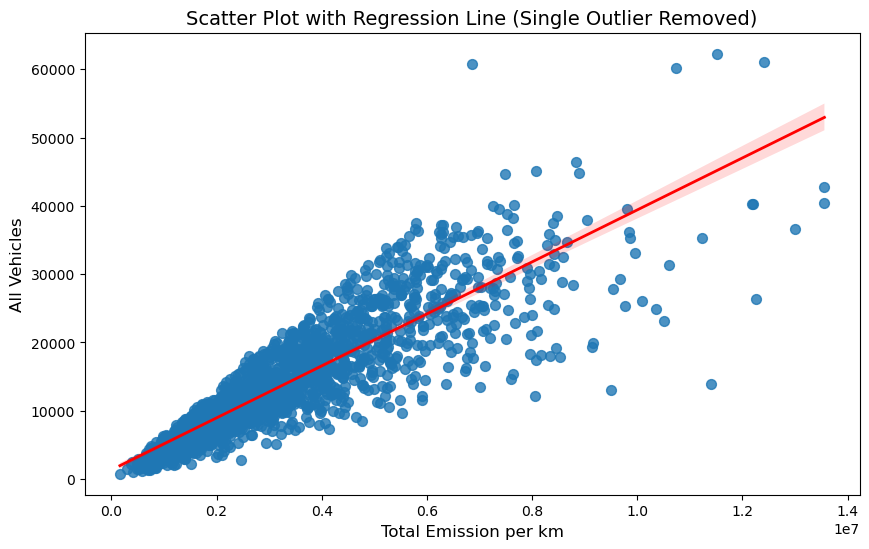

                            OLS Regression Results                            
Dep. Variable:        traffic_volume    R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     6013.
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        02:13:54   Log-Likelihood:                -18326.
No. Observations:                1871   AIC:                         3.666e+04
Df Residuals:                    1869   BIC:                         3.667e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1342.5586    190.074      7.063   

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 데이터 정리
x_data = tot_2022["total_per_km"]
y_data = tot_2022["traffic_volume"]

# 결측치 및 무한대 값 제거
data = pd.DataFrame({"total_per_km": x_data, "traffic_volume ": y_data})
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# 이상치 하나만 제거 (가장 큰 y 값 제거)
outlier_index = data["traffic_volume "].idxmax()  # y값이 가장 큰 인덱스 찾기
filtered_data = data.drop(index=outlier_index)  # 해당 인덱스 제거

x_data = filtered_data["total_per_km"]
y_data = filtered_data["traffic_volume "]

# 회귀 분석 수행
x_with_const = sm.add_constant(x_data)  # 상수항 추가
model = sm.OLS(y_data, x_with_const).fit()

# 산점도 + 회귀선 시각화
plt.figure(figsize=(10, 6))  # 가로가 긴 비율 적용
sns.regplot(x=x_data, y=y_data, scatter_kws={'s': 50, 'alpha': 0.8}, line_kws={'color': 'red', 'linewidth': 2})

# 그래프 제목 및 레이블 추가
plt.title("Scatter Plot with Regression Line (Single Outlier Removed)", fontsize=14)
plt.xlabel("Total Emission per km", fontsize=12)
plt.ylabel("All Vehicles", fontsize=12)

# 테두리 조정
plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.gca().spines["bottom"].set_color("black")

plt.show()

# 회귀분석 결과 출력
print(model.summary())


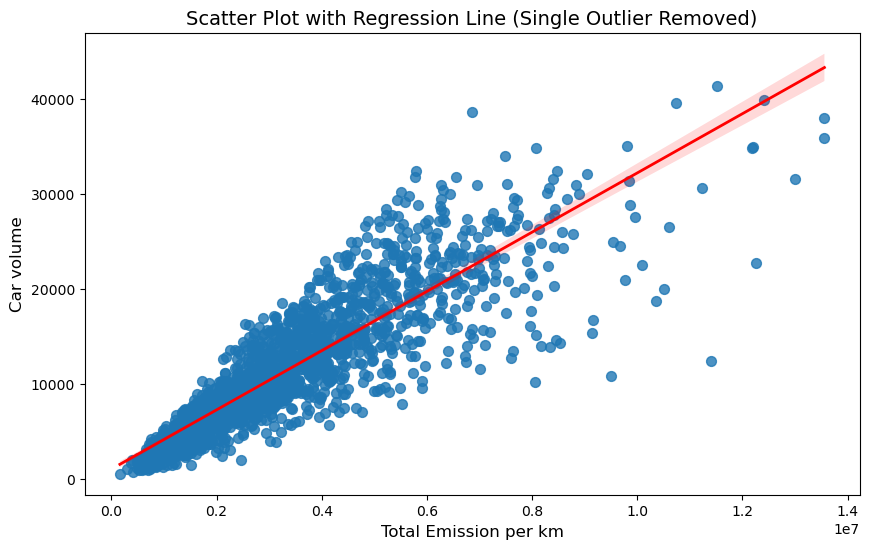

                            OLS Regression Results                            
Dep. Variable:            car_volume    R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     6234.
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        02:53:25   Log-Likelihood:                -17915.
No. Observations:                1871   AIC:                         3.583e+04
Df Residuals:                    1869   BIC:                         3.585e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1082.9094    152.609      7.096   

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 데이터 정리
x_data = tot_2022["total_per_km"]
y_data = road_shp_total["car_volume"]

# 결측치 및 무한대 값 제거
data = pd.DataFrame({"total_per_km": x_data, "car_volume ": y_data})
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# 이상치 하나만 제거 (가장 큰 y 값 제거)
outlier_index = data["car_volume "].idxmax()  # y값이 가장 큰 인덱스 찾기
filtered_data = data.drop(index=outlier_index)  # 해당 인덱스 제거

x_data = filtered_data["total_per_km"]
y_data = filtered_data["car_volume "]

# 회귀 분석 수행
x_with_const = sm.add_constant(x_data)  # 상수항 추가
model = sm.OLS(y_data, x_with_const).fit()

# 산점도 + 회귀선 시각화
plt.figure(figsize=(10, 6))  # 가로가 긴 비율 적용
sns.regplot(x=x_data, y=y_data, scatter_kws={'s': 50, 'alpha': 0.8}, line_kws={'color': 'red', 'linewidth': 2})

# 그래프 제목 및 레이블 추가
plt.title("Scatter Plot with Regression Line (Single Outlier Removed)", fontsize=14)
plt.xlabel("Total Emission per km", fontsize=12)
plt.ylabel("Car volume", fontsize=12)

# 테두리 조정
plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.gca().spines["bottom"].set_color("black")

plt.show()

# 회귀분석 결과 출력
print(model.summary())

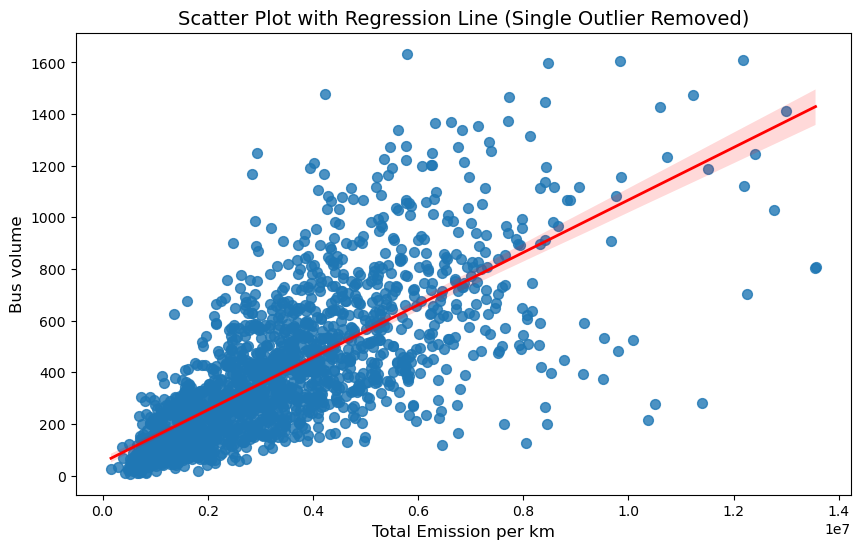

                            OLS Regression Results                            
Dep. Variable:            bus_volume    R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     2145.
Date:                Mon, 10 Mar 2025   Prob (F-statistic):          1.43e-312
Time:                        02:56:01   Log-Likelihood:                -12518.
No. Observations:                1871   AIC:                         2.504e+04
Df Residuals:                    1869   BIC:                         2.505e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           50.5668      8.511      5.941   

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 데이터 정리
x_data = tot_2022["total_per_km"]
y_data = road_shp_total["bus_volume"]

# 결측치 및 무한대 값 제거
data = pd.DataFrame({"total_per_km": x_data, "bus_volume ": y_data})
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# 이상치 하나만 제거 (가장 큰 y 값 제거)
outlier_index = data["bus_volume "].idxmax()  # y값이 가장 큰 인덱스 찾기
filtered_data = data.drop(index=outlier_index)  # 해당 인덱스 제거

x_data = filtered_data["total_per_km"]
y_data = filtered_data["bus_volume "]

# 회귀 분석 수행
x_with_const = sm.add_constant(x_data)  # 상수항 추가
model = sm.OLS(y_data, x_with_const).fit()

# 산점도 + 회귀선 시각화
plt.figure(figsize=(10, 6))  # 가로가 긴 비율 적용
sns.regplot(x=x_data, y=y_data, scatter_kws={'s': 50, 'alpha': 0.8}, line_kws={'color': 'red', 'linewidth': 2})

# 그래프 제목 및 레이블 추가
plt.title("Scatter Plot with Regression Line (Single Outlier Removed)", fontsize=14)
plt.xlabel("Total Emission per km", fontsize=12)
plt.ylabel("Bus volume", fontsize=12)

# 테두리 조정
plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.gca().spines["bottom"].set_color("black")

plt.show()

# 회귀분석 결과 출력
print(model.summary())

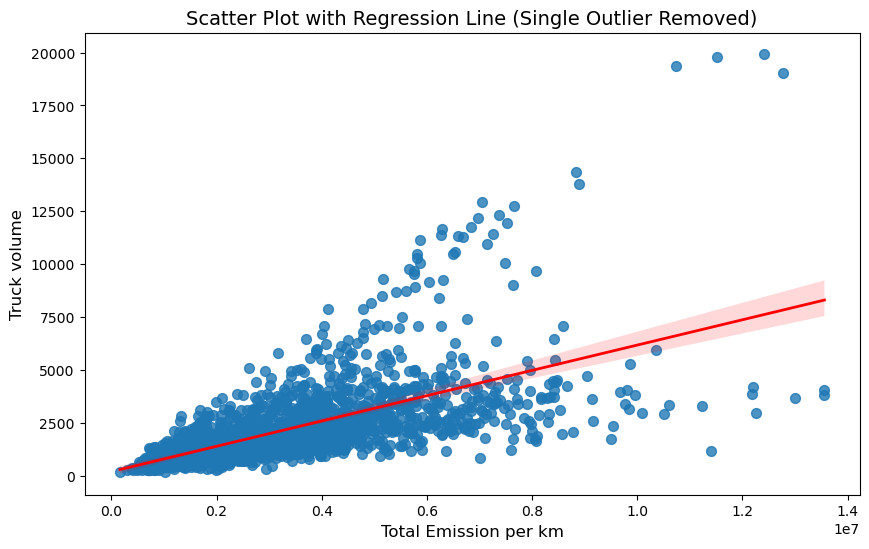

                            OLS Regression Results                            
Dep. Variable:          truck_volume    R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     1270.
Date:                Mon, 10 Mar 2025   Prob (F-statistic):          9.81e-213
Time:                        03:01:57   Log-Likelihood:                -16327.
No. Observations:                1871   AIC:                         3.266e+04
Df Residuals:                    1869   BIC:                         3.267e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          189.1712     65.113      2.905   

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 데이터 정리
x_data = tot_2022["total_per_km"]
y_data = road_shp_total["truck_volume"]

# 결측치 및 무한대 값 제거
data = pd.DataFrame({"total_per_km": x_data, "truck_volume ": y_data})
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# 이상치 하나만 제거 (가장 큰 y 값 제거)
outlier_index = data["truck_volume "].idxmax()  # y값이 가장 큰 인덱스 찾기
filtered_data = data.drop(index=outlier_index)  # 해당 인덱스 제거

x_data = filtered_data["total_per_km"]
y_data = filtered_data["truck_volume "]

# 회귀 분석 수행
x_with_const = sm.add_constant(x_data)  # 상수항 추가
model = sm.OLS(y_data, x_with_const).fit()

# 산점도 + 회귀선 시각화
plt.figure(figsize=(10, 6))  # 가로가 긴 비율 적용
sns.regplot(x=x_data, y=y_data, scatter_kws={'s': 50, 'alpha': 0.8}, line_kws={'color': 'red', 'linewidth': 2})

# 그래프 제목 및 레이블 추가
plt.title("Scatter Plot with Regression Line (Single Outlier Removed)", fontsize=14)
plt.xlabel("Total Emission per km", fontsize=12)
plt.ylabel("Truck volume", fontsize=12)

# 테두리 조정
plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.gca().spines["bottom"].set_color("black")

plt.show()

# 회귀분석 결과 출력
print(model.summary())

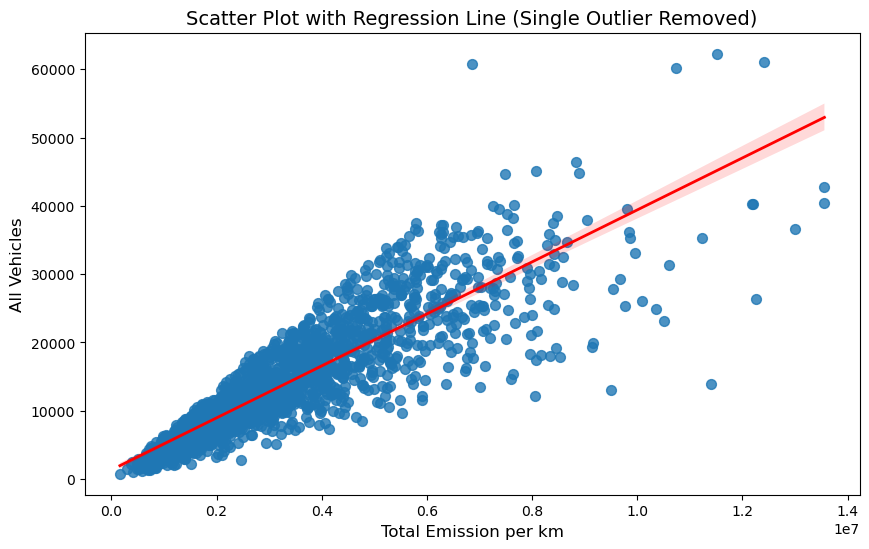

                            OLS Regression Results                            
Dep. Variable:        traffic_volume    R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     6013.
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        02:13:54   Log-Likelihood:                -18326.
No. Observations:                1871   AIC:                         3.666e+04
Df Residuals:                    1869   BIC:                         3.667e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1342.5586    190.074      7.063   

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 데이터 정리
x_data = tot_2022["total_per_km"]
y_data = tot_2022["traffic_volume"]

# 결측치 및 무한대 값 제거
data = pd.DataFrame({"total_per_km": x_data, "traffic_volume ": y_data})
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# 이상치 하나만 제거 (가장 큰 y 값 제거)
outlier_index = data["traffic_volume "].idxmax()  # y값이 가장 큰 인덱스 찾기
filtered_data = data.drop(index=outlier_index)  # 해당 인덱스 제거

x_data = filtered_data["total_per_km"]
y_data = filtered_data["traffic_volume "]

# 회귀 분석 수행
x_with_const = sm.add_constant(x_data)  # 상수항 추가
model = sm.OLS(y_data, x_with_const).fit()

# 산점도 + 회귀선 시각화
plt.figure(figsize=(10, 6))  # 가로가 긴 비율 적용
sns.regplot(x=x_data, y=y_data, scatter_kws={'s': 50, 'alpha': 0.8}, line_kws={'color': 'red', 'linewidth': 2})

# 그래프 제목 및 레이블 추가
plt.title("Scatter Plot with Regression Line (Single Outlier Removed)", fontsize=14)
plt.xlabel("Total Emission per km", fontsize=12)
plt.ylabel("All Vehicles", fontsize=12)

# 테두리 조정
plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.gca().spines["bottom"].set_color("black")

plt.show()

# 회귀분석 결과 출력
print(model.summary())


In [85]:
co2_2022 = road_shp_total[road_shp_total['standard_year'] == 2022]  #2022년 데이터만 추출
co2_2022['co2_per_km'] = co2_2022['co2_emission'] / co2_2022['k_length']

c:\Users\cham3\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [86]:
tot_2022 = road_shp_total[road_shp_total['standard_year'] == 2022]  #2022년 데이터만 추출
tot_2022['total_per_km'] = co2_2022['co2_emission'] / tot_2022['k_length']
tot_2022['co2_per_km'] = co2_2022['co2_emission'] / tot_2022['k_length']
tot_2022['nox_per_km'] = co2_2022['nox_emission'] / tot_2022['k_length']
tot_2022['pm_per_km'] = co2_2022['pm_emission'] / tot_2022['k_length']
tot_2022['co1_per_km'] = co2_2022['co2_emission'] / tot_2022['k_length']

c:\Users\cham3\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\cham3\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\cham3\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [87]:
tot_2022

,k_link_id,fnode_id,tnode_id,road_name,road_no,road_rank,link_type,lane,road_info,sido_id,...,co2_emission,nox_emission,total_emission,pm_emission,co_emission,total_per_km,co2_per_km,nox_per_km,pm_per_km,co1_per_km
3,1026318.0,277802.0,280751.0,동서대로,0,104.0,32768.0,8.0,None,25000.0,...,2325726.016,3239.938,2328965.954,31.451,1242.344,4.413142e+06,4.413142e+06,6147.889943,59.679317,4.413142e+06
7,1026319.0,280749.0,280751.0,동서대로,0,104.0,32768.0,8.0,None,25000.0,...,2670340.018,3836.415,2674176.433,33.470,1403.970,5.298294e+06,5.298294e+06,7611.934524,66.408730,5.298294e+06
11,1026320.0,277802.0,279013.0,동서대로,0,104.0,32768.0,8.0,None,25000.0,...,2452750.245,3462.652,2456212.897,30.005,1305.882,5.240919e+06,5.240919e+06,7398.829060,64.113248,5.240919e+06
15,1026321.0,279013.0,277802.0,동서대로,0,104.0,32768.0,8.0,None,25000.0,...,3787283.720,5282.377,3792566.097,39.244,2007.962,8.092487e+06,8.092487e+06,11287.130342,83.854701,8.092487e+06
19,1026322.0,278075.0,277811.0,배재로,0,104.0,32768.0,4.0,None,25000.0,...,2017658.099,2840.734,2020498.833,27.179,1095.018,1.945668e+06,1.945668e+06,2739.377049,26.209257,1.945668e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,8909970.0,611493.0,308422.0,대덕대로1284번길,0,104.0,32768.0,2.0,None,25000.0,...,504211.008,899.385,505110.393,9.421,370.161,3.093319e+06,3.093319e+06,5517.699387,57.797546,3.093319e+06
6997,8909971.0,308422.0,308416.0,대덕대로,32,105.0,32768.0,8.0,None,25000.0,...,2290408.097,3615.166,2294023.263,40.380,1343.152,3.767119e+06,3.767119e+06,5945.996711,66.414474,3.767119e+06
6998,8909972.0,308416.0,308422.0,대덕대로,32,105.0,32768.0,8.0,None,25000.0,...,2904808.315,4310.015,2909118.330,48.651,1641.863,4.777645e+06,4.777645e+06,7088.840461,80.018092,4.777645e+06
6999,8910458.0,300950.0,301919.0,유성대로,32,105.0,32768.0,8.0,None,25000.0,...,7083365.881,9954.948,7093320.829,88.772,3707.966,3.911301e+06,3.911301e+06,5496.934290,49.018222,3.911301e+06


In [ ]:
df = pd.read_csv("C://Users//cham3//Desktop//2022모음//total_2022.csv")
df_cleaned = df.dropna()  # NaN이 있는 행 삭제
df_cleaned = df.dropna(axis=1)  # NaN이 있는 열 삭제
df_cleaned